In [161]:
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
'''Useful functions'''
def sigmoid(z):
    return 1/ (1+ np.exp(-z))  

def sigmoidPrime(z):
    return np.exp(-z) / ((1+np.exp(-z))**2)

In [225]:
import numpy as np
from numpy.linalg import norm

class Neural_Network(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSizes, Lambda):
        #Define Hyperparameters:
        self.inputLayerSize = inputLayerSize 
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSizes
#         self.hiddenLayerSize2 = hiddenLayerSize[2]
#         self.hiddenLayerSize3 = hiddenLayerSize[3]
        self.Lambda = Lambda
        # weights matrices
        self.W1 = np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    
    def forward(self, X): 
        # propagate 
        self.z2 = np.dot(X, self.W1)
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.yHat = sigmoid(self.z3)
        return self.yHat
        
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(norm(self.W1)+norm(self.W2)) 
        return J     
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def getParams(self):
        #get W1 and W2 rolled into vector
        params = np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #get W1 and W2 using single parameter vector
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start: W1_end], \
                            (self.inputLayerSize,self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize* self.outputLayerSize
        self.W2 = np.reshape(params[W1_end: W2_end], \
                            (self.hiddenLayerSize,self.outputLayerSize))
    
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate( (dJdW1.ravel(), dJdW2.ravel()))

In [226]:
X = np.random.rand(3,2)
y = np.random.rand(3,1)

In [227]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4
    

In [228]:
from scipy import optimize

In [229]:
class Trainer(object):
    def __init__(self, N):
        self.N = N
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))  
    
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def train(self, X, y):
        
        self.X= X
        self.y= y
        
        # make empty list to store costs
        self.J = []
        params0 = self.N.getParams()
        options ={'maxiter' : 200, 'disp':True}
        
        
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                                jac = True, method ='BFGS', args = (X,y) \
                                 , callback=self.callbackF
                                )
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [230]:
inputLayerSize = 2 
outputLayerSize = 1
hiddenLayerSize = 3
Lambda = 0.0001 
NN = Neural_Network(inputLayerSize = 2, outputLayerSize = 1, hiddenLayerSize = 3, Lambda = 0.0001  )
T = Trainer(NN)

In [220]:
norm(NN.W1)

1.3530310283696441

In [222]:
T.train(X, y)

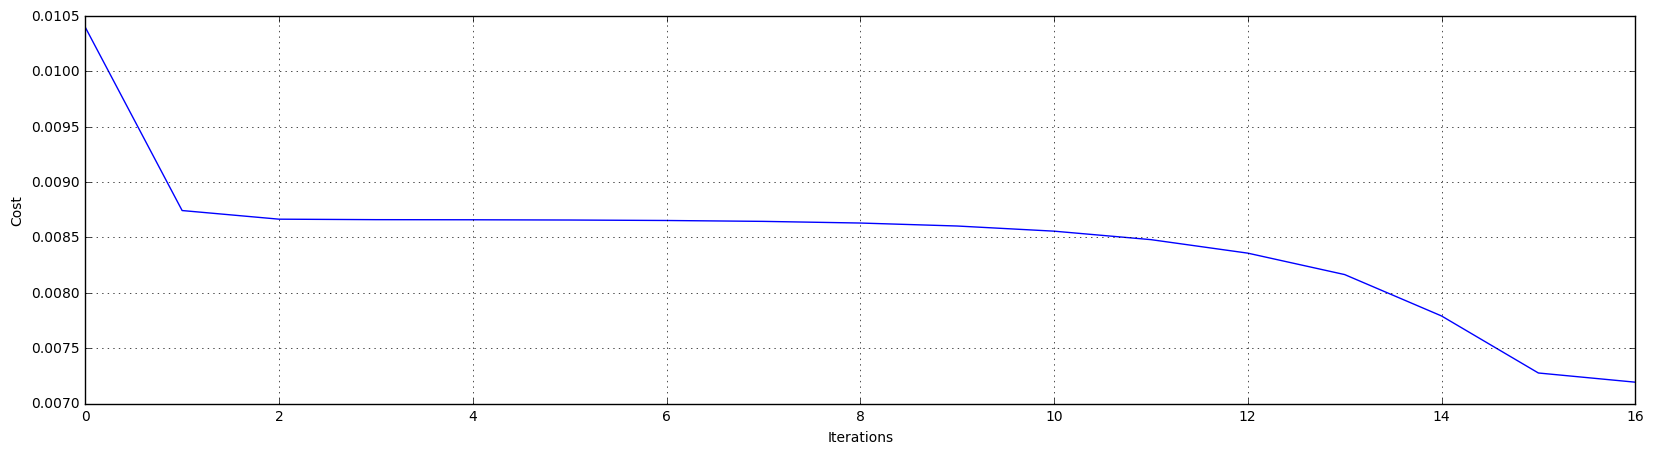

In [223]:
plt.figure(figsize=(20,5))
plt.plot(T.J)
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')